In [1]:
import pandas as pd
import numpy as np
from keras.datasets import boston_housing
from tensorflow.keras import layers, models, optimizers

In [2]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

In [3]:
train_data.shape

(404, 13)

In [4]:
train_labels.shape

(404,)

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
train_labels[0]

15.2

In [7]:
mean = train_data.mean(axis=0)
train_data = train_data - mean
std = train_data.std(axis=0)
train_data = train_data / std

test_data = test_data - mean
test_data = test_data / std

In [8]:
def build_model_regression(lr_var, input_data):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_data,)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))
    model.compile(optimizer = optimizers.RMSprop(lr=lr_var), loss='mse', metrics=['mae'])
    return model

In [9]:
k = 4
num_val_samples = len(train_data) // k
num_epoch = 85
all_history = []

In [10]:
valor = 2
(valor) * num_val_samples

202

In [11]:
for i in range(k):
    print('Fold: ', i)
    val_data = train_data[i * num_val_samples : (i+1) * num_val_samples]
    val_targets = train_labels[i * num_val_samples : (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
        [train_data[:i * num_val_samples],
         train_data[(i+1) * num_val_samples :]            
        ],
        axis=0)
    
    partial_train_targets = np.concatenate(
        [train_labels[:i * num_val_samples],
         train_labels[(i+1) * num_val_samples :]            
        ],
        axis=0)
    
    model = build_model_regression(0.001, 13)
    history = model.fit(partial_train_data, partial_train_targets,
                       epochs=num_epoch,
                       batch_size=16,
                       validation_data=(val_data, val_targets),
                       verbose=0
                       )
    all_history.append(history.history['val_mae'])

Fold:  0


c:\users\usuario\desktop\platzi\keras_ml\venv\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


Fold:  1
Fold:  2
Fold:  3


In [12]:
all_mae_avg = pd.DataFrame(all_history).mean(axis=0)

In [13]:
all_mae_avg

0     19.786549
1     16.850964
2     13.190289
3      9.492727
4      6.800288
        ...    
80     2.334044
81     2.436133
82     2.424900
83     2.353707
84     2.382812
Length: 85, dtype: float64

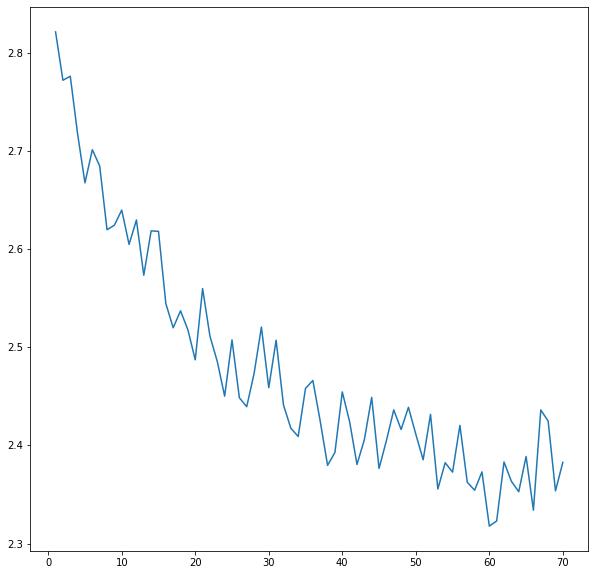

In [14]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,10))
plt.plot(range(1, len(all_mae_avg[15:])+1), all_mae_avg[15:])
plt.show()

In [15]:
model.evaluate(test_data, test_labels)

4/4 [==============================] - 0s 998us/step - loss: 19.7936 - mae: 2.8404


[19.793609619140625, 2.8403844833374023]